In [ ]:
!pip install qiskit
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130

In [ ]:
from qiskit import *
from qiskit.visualization import plot_distribution
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

In [ ]:
service = QiskitRuntimeService(channel="ibm_quantum", token="0915daf216a1e8a92bdbd0e45cbb23c810a3a0ccbc2224b71af944fb3c46a9ce706d9bd6a2c9c7e85113ad278b8f42588e4868430667f80f769b54093bc15ceb")
backend=service.least_busy(operational=True, simulator=False)
print(backend.name)

ibm_kyiv


Enter the state you want to teleport 0 for|0> 1 for |1> 2 for |+> 3for |->3


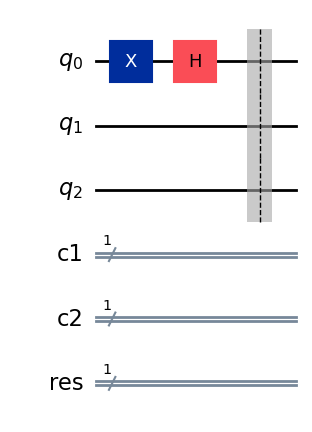

In [ ]:
c1=ClassicalRegister(1,'c1')
q=QuantumRegister(3,'q')
c2=ClassicalRegister(1,'c2')
res=ClassicalRegister(1,'res')
tc=QuantumCircuit(c1,q,c2,res)

state=input("Enter the state you want to teleport 0 for|0> 1 for |1> 2 for |+> 3for |->")
match state:
  case "0":pass
  case "1": tc.x(0)
  case "2": tc.h(0)
  case "3":
    tc.x(0)
    tc.h(0)
tc.barrier(range(3))


tc.draw(output="mpl")




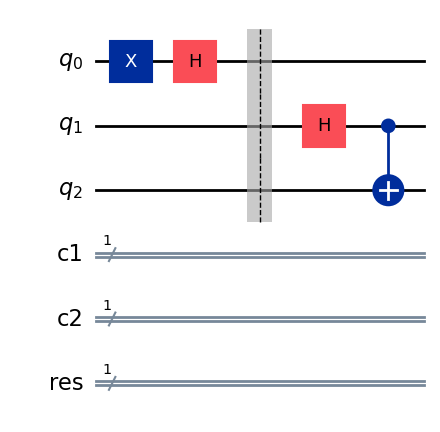

In [ ]:
tc.h(1)
tc.cx(1,2)

tc.draw(output="mpl")

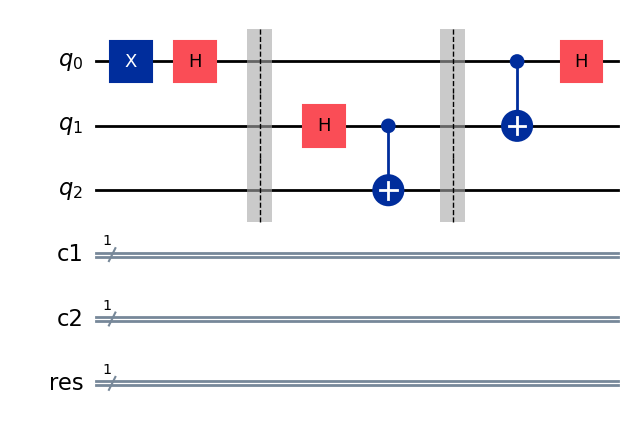

In [ ]:
tc.barrier(range(3))
tc.cx(0,1)
tc.h(0)
tc.draw(output="mpl")

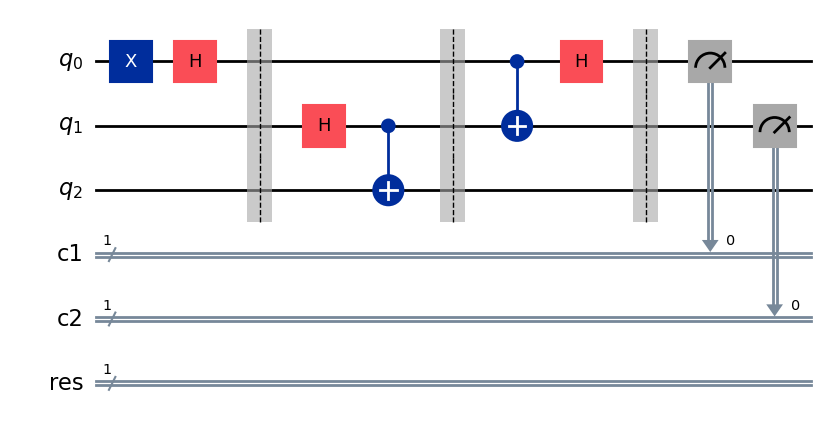

In [ ]:
tc.barrier(range(3))
tc.measure(0,c1)
tc.measure(1,c2)
tc.draw(output="mpl")

In [ ]:
print (c1,c2)

ClassicalRegister(1, 'c1') ClassicalRegister(1, 'c2')


<ipython-input-48-eea6e4d48d9f>:1: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  tc.x(2).c_if(c1, 1)
<ipython-input-48-eea6e4d48d9f>:2: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  tc.z(2).c_if(c2, 1)


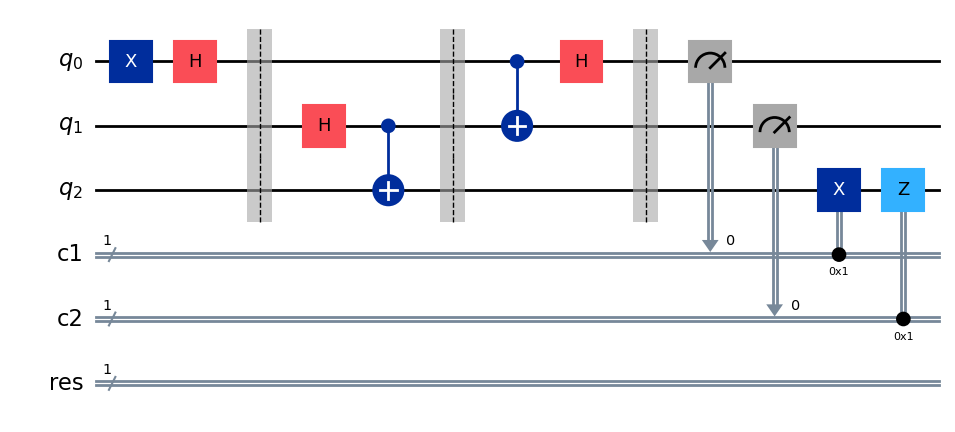

In [ ]:
tc.x(2).c_if(c1, 1)
tc.z(2).c_if(c2, 1)
tc.draw(output="mpl")

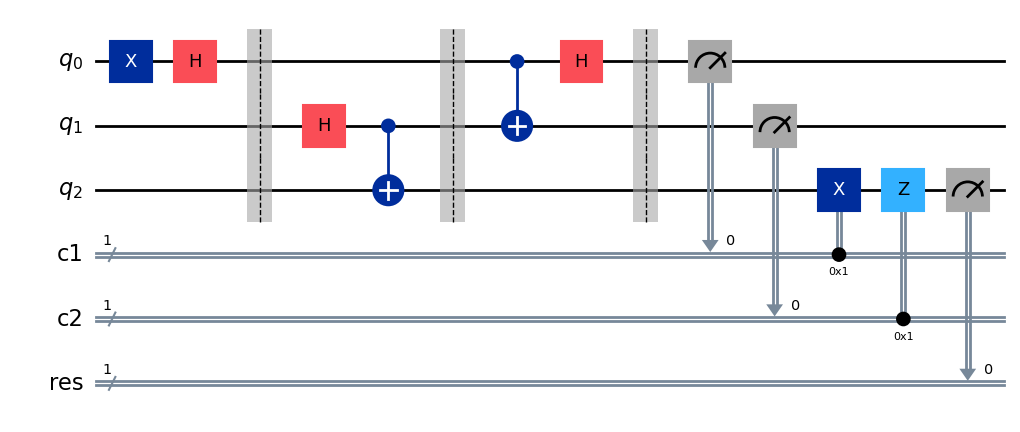

In [ ]:
tc.measure(2,res)
tc.draw(output="mpl")

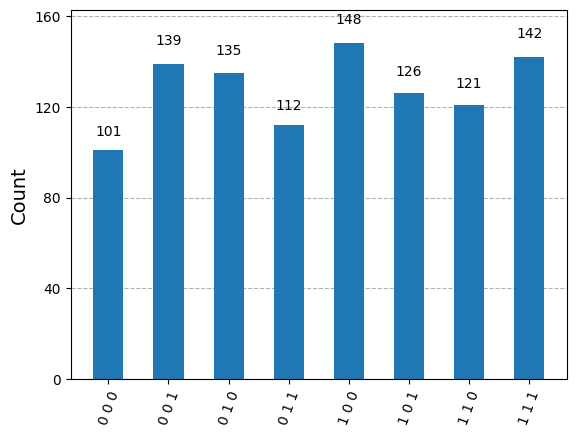

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Session as Session

result = AerSimulator().run(tc).result()
statistics = result.get_counts()
display(plot_histogram(statistics))


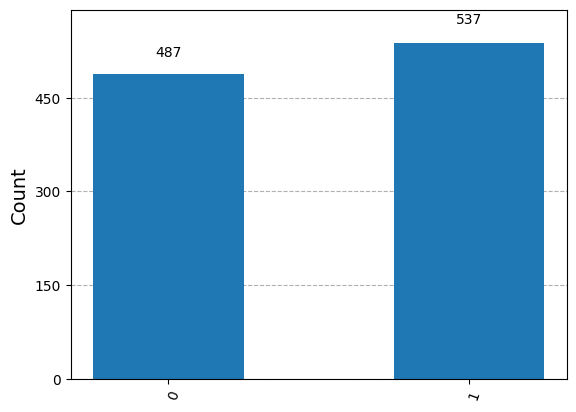

In [ ]:
from qiskit.result import marginal_distribution
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))